In [1]:
# Artificial Neural Network

# Installing Theano
# pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
# pip install tensorflow

# Installing Keras
# pip install --upgrade keras

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer


# Importing the dataset
dataset = pd.read_csv('/home/joy/Documents/4.1 notes/com 404e/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
#onehotencoder = OneHotEncoder(categorical_features = [1])## Replace this with
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [1])], remainder = 'passthrough')
#X = onehotencoder.fit_transform(X).toarray()##Replace this with
X = np.array(columnTransformer.fit_transform(X), dtype = np.float64)
X = X[:, 1:]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)

# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
print("First 10 predictions on test set:", y_pred[:10])

# Predicting a single new observation
"""Predict if the customer with the following informations will leave the bank:
Geography: France
Credit Score: 900
Gender: Female
Age: 38
Tenure: 2
Balance: 90000
Number of Products: 3
Has Credit Card: No
Is Active Member: Yes
Estimated Salary: 80000"""
from IPython.display import display
new_customer = np.array([[1.0, 0, 900, 0, 38, 2, 90000, 3, 0, 1, 80000]])
new_customer_scaled = sc.transform(new_customer)
new_prediction = classifier.predict(new_customer_scaled)
new_prediction = (new_prediction > 0.5)
print("will leave" if new_prediction [0][0] else "will stay")

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

2025-10-25 09:20:47.281605: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/joy/anaconda3/envs/ml_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7949 - loss: 0.4873
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7960 - loss: 0.4277
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7960 - loss: 0.4218
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8177 - loss: 0.4183
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8269 - loss: 0.4158
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8284 - loss: 0.4140
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8300 - loss: 0.4129
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8321 - loss: 0.4117
Epoch 9/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8331 - loss: 0.4106
Epoch 10/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8336 - loss: 0.4096
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
First 10 predictions on test set: [[False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [F

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder ,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Dense
from IPython.display import display

In [3]:
dataset = pd.read_csv('/home/joy/Documents/4.1 notes/com 404e/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [1])], remainder = 'passthrough')
X = np.array(columnTransformer.fit_transform(X), dtype = np.float64)
X = X[:, 1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [4]:
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



/home/joy/anaconda3/envs/ml_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)

Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7951 - loss: 0.4926
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7960 - loss: 0.4311
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7960 - loss: 0.4281
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7960 - loss: 0.4238
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8231 - loss: 0.4198
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8250 - loss: 0.4174
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8281 - loss: 0.4157
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8296 - loss: 0.4137
Epoch 9/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8314 - loss: 0.4126
Epoch 10/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8328 - loss: 0.4097


In [8]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
print("First 10 predictions on test set:", y_pred[:10])

new_customer = np.array([[1.0, 0, 900, 0, 38, 2, 90000, 3, 0, 1, 80000]])
new_customer_scaled = sc.transform(new_customer)
new_prediction = classifier.predict(new_customer_scaled)
new_prediction = (new_prediction > 0.5)
print("will leave" if new_prediction [0][0] else "will stay")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
First 10 predictions on test set: [[False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
will stay
Confusion Matrix:
 [[1534   61]
 [ 259  146]]


Epoch 1/100


/home/joy/anaconda3/envs/ml_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7952 - loss: 0.5123 - val_accuracy: 0.7969 - val_loss: 0.4293
Epoch 2/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8172 - loss: 0.4141 - val_accuracy: 0.8288 - val_loss: 0.4113
Epoch 3/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8269 - loss: 0.3997 - val_accuracy: 0.8313 - val_loss: 0.3987
Epoch 4/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8292 - loss: 0.3893 - val_accuracy: 0.8325 - val_loss: 0.3911
Epoch 5/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8313 - loss: 0.3816 - val_accuracy: 0.8344 - val_loss: 0.3858
Epoch 6/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8328 - loss: 0.3756 - val_accuracy: 0.8369 - val_loss: 0.3821
Epoch 7/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8433 - loss: 0.3704 - val_accuracy: 0.8356 - val_loss: 0.3812
Epoch 8/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8431 - loss: 0.3679 - val_accuracy: 0.8431

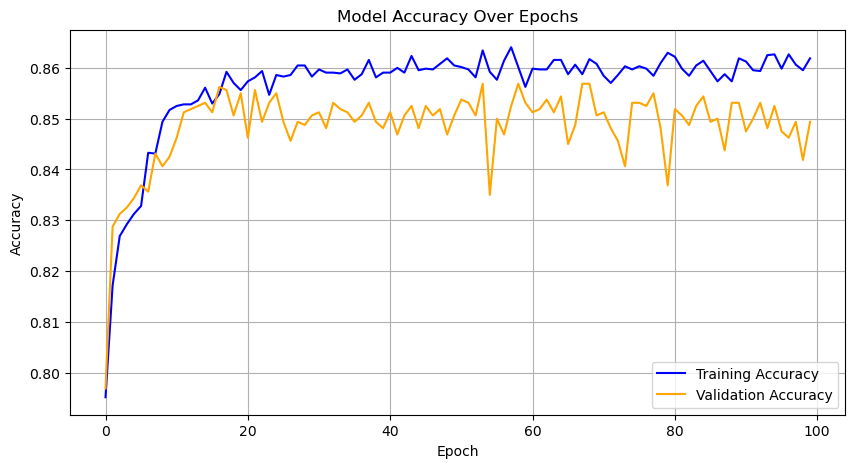

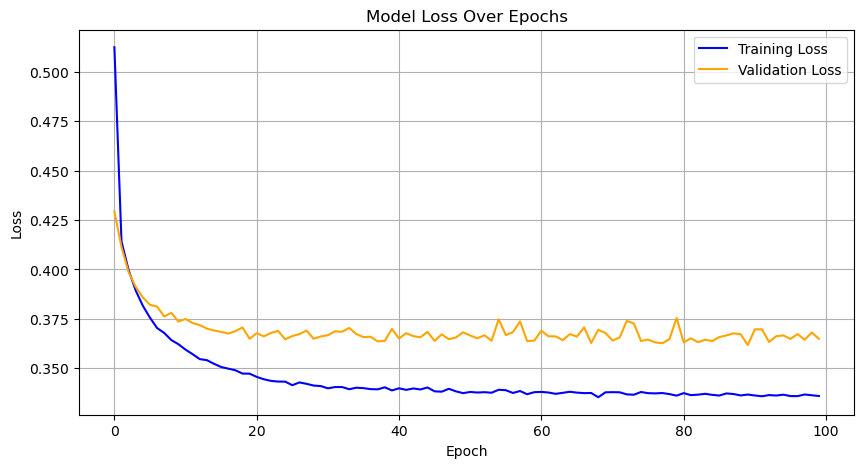

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8560 - loss: 0.3423

✅ Test Accuracy: 85.60%
✅ Test Loss: 0.3423


In [9]:
# Part 2 - Building and Training the ANN

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=11))

# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the Training set and storing history
history = classifier.fit(X_train, y_train, validation_split=0.2, batch_size=10, epochs=100)

# ---- Plot Training & Validation Accuracy ----
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# ---- Plot Training & Validation Loss ----
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# ---- Evaluate on Test Data ----
test_loss, test_accuracy = classifier.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {test_accuracy*100:.2f}%")
print(f"✅ Test Loss: {test_loss:.4f}")


Epoch 1/100


/home/joy/anaconda3/envs/ml_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


640/640 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7945 - loss: 0.4985 - val_accuracy: 0.7969 - val_loss: 0.4371
Epoch 2/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7958 - loss: 0.4299 - val_accuracy: 0.7969 - val_loss: 0.4334
Epoch 3/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7958 - loss: 0.4258 - val_accuracy: 0.7969 - val_loss: 0.4299
Epoch 4/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7958 - loss: 0.4218 - val_accuracy: 0.7969 - val_loss: 0.4258
Epoch 5/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8192 - loss: 0.4185 - val_accuracy: 0.8256 - val_loss: 0.4229
Epoch 6/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8259 - loss: 0.4163 - val_accuracy: 0.8269 - val_loss: 0.4204
Epoch 7/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8306 - loss: 0.4144 - val_accuracy: 0.8256 - val_loss: 0.4187
Epoch 8/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8331 - loss: 0.4127 - val_accuracy: 0.8263

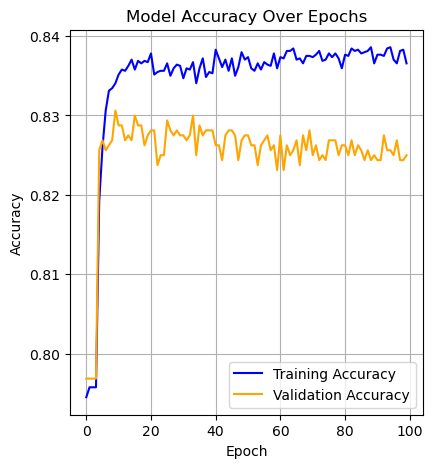

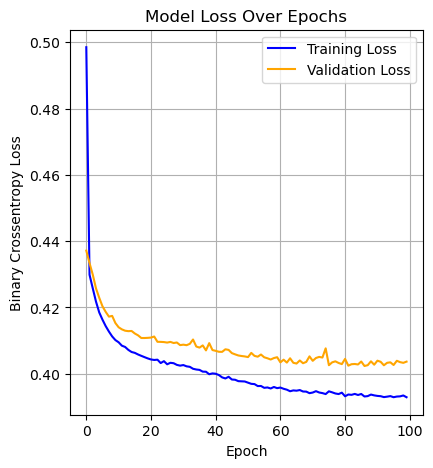

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8430 - loss: 0.3992

✅ Test Accuracy: 84.30%
✅ Test Loss: 0.3992
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


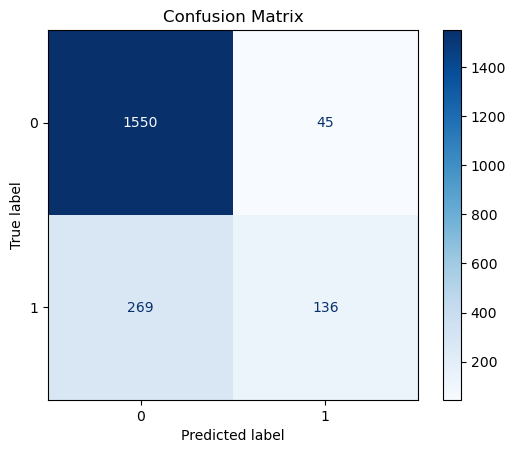

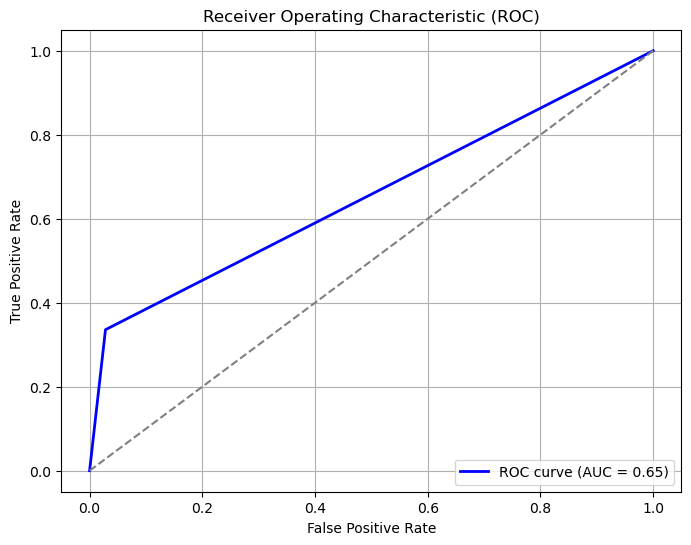

In [15]:
# -------------------------------
# Artificial Neural Network (ANN)
# -------------------------------

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('/home/joy/Documents/4.1 notes/com 404e/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])   # Geography
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])   # Gender

#OneHotEncode Geography column
columnTransformer = ColumnTransformer(
    [('encoder', OneHotEncoder(), [1])],
    remainder='passthrough'
)
X = np.array(columnTransformer.fit_transform(X), dtype=np.float64)
X = X[:, 1:]  # Avoid dummy variable trap

# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# ------------------------------
# Building the ANN
# ------------------------------
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

# Input & first hidden layer
classifier.add(Dense(units=6, activation='relu', kernel_initializer='uniform', input_dim=11))

# Second hidden layer
classifier.add(Dense(units=6, activation='relu', kernel_initializer='uniform'))

# Output layer
classifier.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))

# Compile the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ------------------------------
# Training and capturing history
# ------------------------------
history = classifier.fit(
    X_train, y_train,
    validation_split=0.2,   # Reserve 20% of training data for validation
    batch_size=10,
    epochs=100,
    verbose=1
)

# ------------------------------
# Plot Performance: Accuracy
# ------------------------------###line1 i changed a few things(below)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# ------------------------------
# Plot Performance: Loss
# ------------------------------###also here made some changes

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy Loss')
plt.legend()
plt.grid(True)
plt.show()

# ------------------------------
# Evaluate the model on test data
# ------------------------------
test_loss, test_accuracy = classifier.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"✅ Test Loss: {test_loss:.4f}")

# ------------------------------
# Confusion Matrix Heatmap
# ------------------------------
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ------------------------------
# Optional: ROC Curve & AUC
# ------------------------------
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [16]:
import numpy as np

# New customer details:
# Geography: France, Credit Score: 900, Gender: Female, Age: 38, Tenure: 2, Balance: 90000,
# NumOfProducts: 3, HasCrCard: No, IsActiveMember: Yes, Estimated Salary: 80000

# Create input array
new_customer = np.array([[1.0, 0, 900, 0, 38, 2, 90000, 3, 0, 1, 80000]])

# Scale using same StandardScaler used for training
new_customer_scaled = sc.transform(new_customer)

# Make prediction
new_prediction = classifier.predict(new_customer_scaled)

# Convert probability → readable label
if new_prediction[0][0] > 0.5:
    print(f"🔴 The model predicts this customer will LEAVE the bank. (Confidence: {new_prediction[0][0]*100:.2f}%)")
else:
    print(f"🟢 The model predicts this customer will STAY with the bank. (Confidence: {(1 - new_prediction[0][0])*100:.2f}%)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
🟢 The model predicts this customer will STAY with the bank. (Confidence: 68.83%)


Epoch 1/100


/home/joy/anaconda3/envs/ml_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7959 - loss: 0.4936 - val_accuracy: 0.7969 - val_loss: 0.4388
Epoch 2/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7958 - loss: 0.4305 - val_accuracy: 0.7969 - val_loss: 0.4354
Epoch 3/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7958 - loss: 0.4283 - val_accuracy: 0.7969 - val_loss: 0.4330
Epoch 4/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7958 - loss: 0.4260 - val_accuracy: 0.7969 - val_loss: 0.4305
Epoch 5/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8033 - loss: 0.4239 - val_accuracy: 0.8144 - val_loss: 0.4276
Epoch 6/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8180 - loss: 0.4212 - val_accuracy: 0.8244 - val_loss: 0.4245
Epoch 7/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8227 - loss: 0.4189 - val_accuracy: 0.8269 - val_loss: 0.4217
Epoch 8/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8275 - loss: 0.4160 - val_accuracy: 0.8256

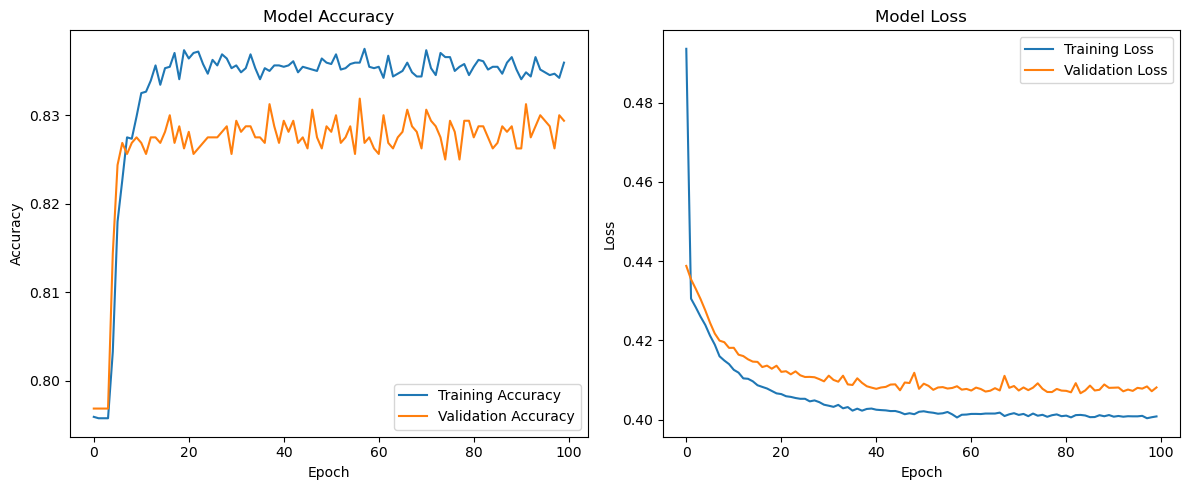

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


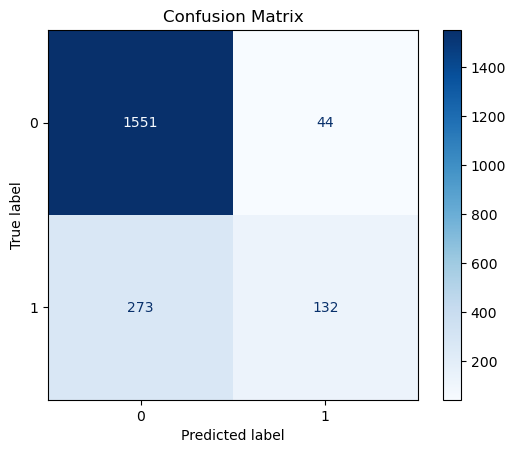

In [14]:
# ===============================
# 1️⃣ Import the libraries
# ===============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ===============================
# 2️⃣ Import the dataset
# ===============================
dataset = pd.read_csv('/home/joy/Documents/4.1 notes/com 404e/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

# ===============================
# 3️⃣ Encode categorical data
# ===============================
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])  # Geography
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])  # Gender

# OneHotEncode the Geography column
columnTransformer = ColumnTransformer(
    [('encoder', OneHotEncoder(), [1])],
    remainder='passthrough'
)
X = np.array(columnTransformer.fit_transform(X), dtype=np.float64)
X = X[:, 1:]  # Avoid dummy variable trap

# ===============================
# 4️⃣ Split the dataset
# ===============================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# ===============================
# 5️⃣ Feature Scaling
# ===============================
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# ===============================
# 6️⃣ Build the ANN
# ===============================
classifier = Sequential([
    Dense(units=6, activation='relu', input_dim=11, kernel_initializer='uniform'),
    Dense(units=6, activation='relu', kernel_initializer='uniform'),
    Dense(units=1, activation='sigmoid', kernel_initializer='uniform')
])

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ===============================
# 7️⃣ Train the ANN & record history
# ===============================
history = classifier.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=10,
    epochs=100,
    verbose=1
)

# ===============================
# 8️⃣ Plot performance
# ===============================
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# ===============================
# 9️⃣ Confusion Matrix
# ===============================
y_pred = (classifier.predict(X_test) > 0.5)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [17]:
import numpy as np

# New customer details:
# Geography: France, Credit Score: 900, Gender: Female, Age: 38, Tenure: 2, Balance: 90000,
# NumOfProducts: 3, HasCrCard: No, IsActiveMember: Yes, Estimated Salary: 80000

# Create input array
new_customer = np.array([[1.0, 0, 900, 0, 38, 2, 90000, 3, 0, 1, 80000]])

# Scale using same StandardScaler used for training
new_customer_scaled = sc.transform(new_customer)

# Make prediction
new_prediction = classifier.predict(new_customer_scaled)

# Convert probability → readable label
if new_prediction[0][0] > 0.5:
    print(f"🔴 The model predicts this customer will LEAVE the bank. (Confidence: {new_prediction[0][0]*100:.2f}%)")
else:
    print(f"🟢 The model predicts this customer will STAY with the bank. (Confidence: {(1 - new_prediction[0][0])*100:.2f}%)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
🟢 The model predicts this customer will STAY with the bank. (Confidence: 68.83%)


In [18]:
import os
print(os.getcwd())

/home/joy
